In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
from tqdm.notebook import tqdm
plt.rcParams["font.family"] = 'Times New Roman'
plt.rcParams["font.size"] = 25

## 2軸プロット

Text(0, 0.5, '$|u_{10}|$')

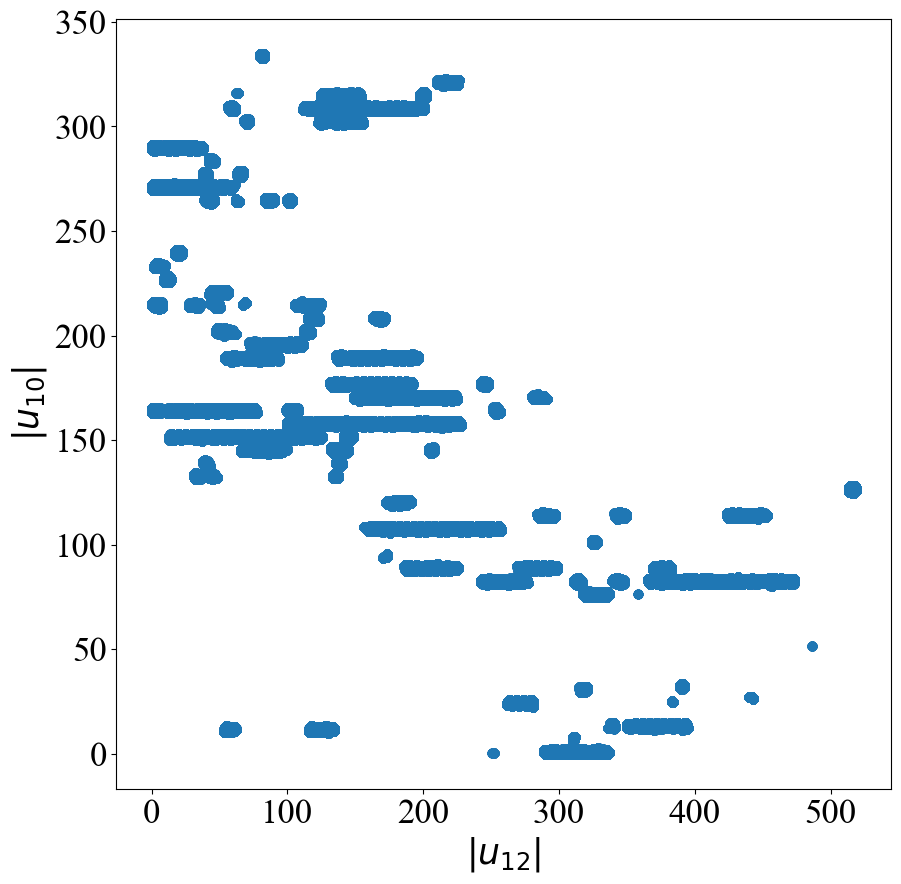

In [29]:
traj = abs(np.load("../sync/npy/sync_beta0.417nu0.00018_1e+06period100000window_5-8_5-11_5-14_8-11_8-14_11-14_6-9_6-12_9-12.npy"))
plotDim1 = 12
plotDim2 = 10
start = 0
end = -1
skip = 1

plt.figure(figsize=(10, 10))
plt.scatter(traj[plotDim1-1,:], traj[plotDim2-1,:])

plt.xlabel(fr"$|u_{{{plotDim1}}}|$")
plt.ylabel(fr"$|u_{{{plotDim2}}}|$")

## 位相プロット

[Text(0, 0.0, '$0\\pi$'),
 Text(0, 6.283185307179586, '$2\\pi$'),
 Text(0, 12.566370614359172, '$4\\pi$'),
 Text(0, 18.84955592153876, '$6\\pi$'),
 Text(0, 25.132741228718345, '$8\\pi$')]

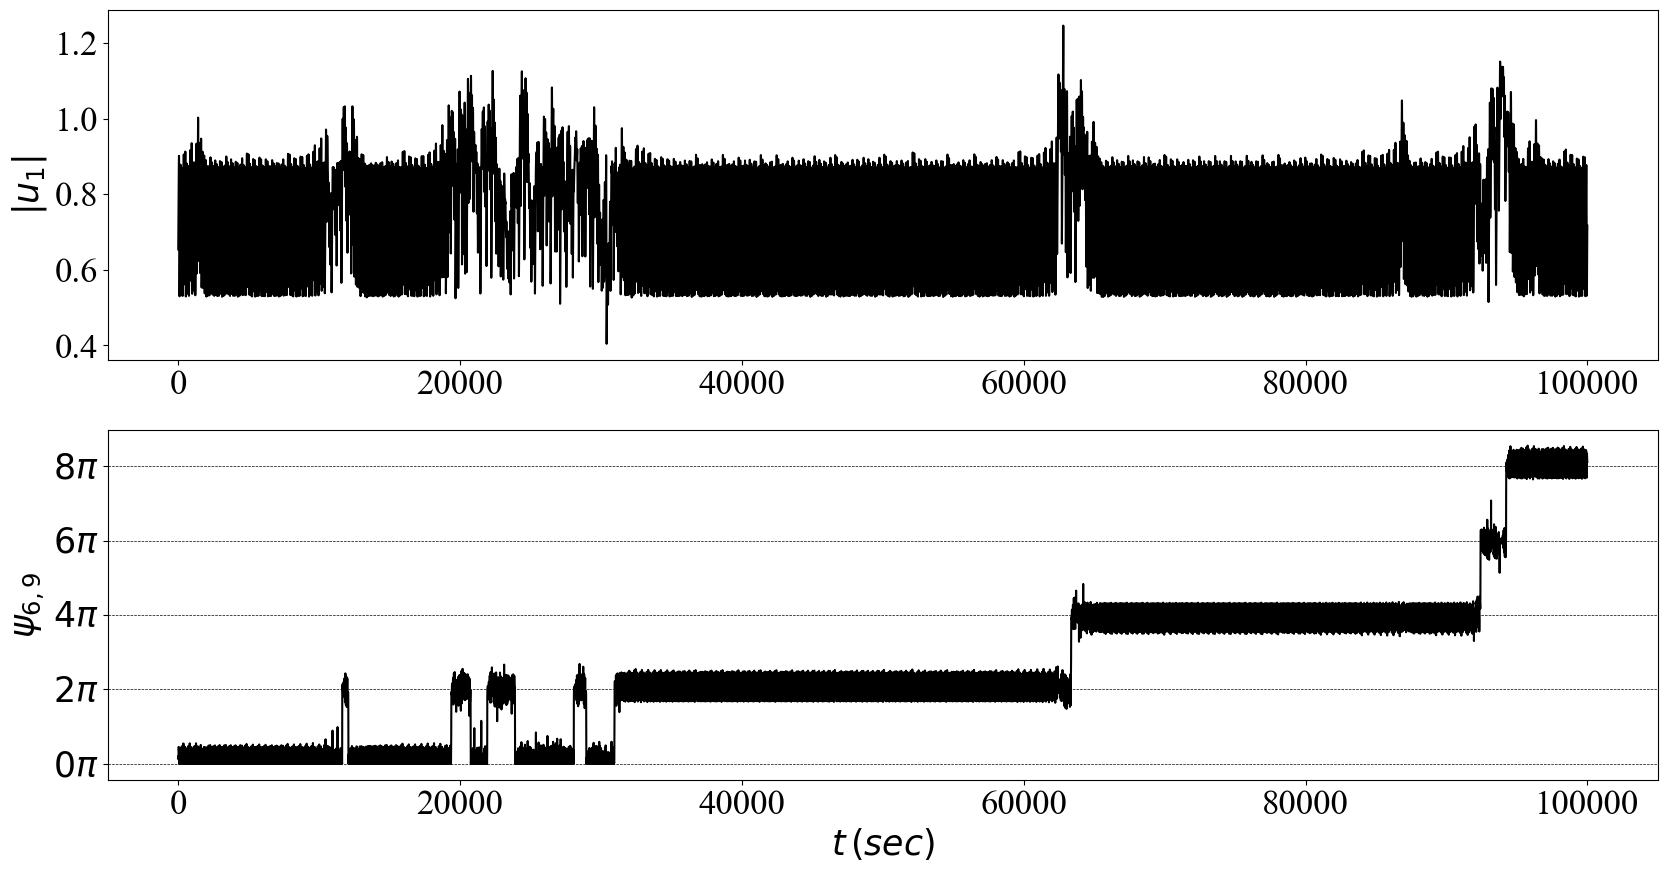

In [12]:
traj = np.load("../traj/beta0.4162nu0.00018t1.000000e+05dump1.000000e+05.npy")
time = 15
plotDim2 = 1
phase1 = 6
phase2 = 9
start = 0
end = -1
skip = 1

x = np.abs(traj[time-1,start:end:skip])
y = np.abs(traj[plotDim2-1,start:end:skip])
unwrapped1 = np.unwrap(np.angle(traj[phase1-1,]))
unwrapped2 = np.unwrap(np.angle(traj[phase2-1,]))
phase_diff = np.abs(unwrapped1 - unwrapped2)[start:end:skip]

fig = plt.figure(figsize=(20, 10))
gs = GridSpec(2, 1, height_ratios=[1, 1])
ax0 = plt.subplot(gs[0])
ax0.plot(x, y, c="black")
# ax0.set_xlabel(fr"$t\, (sec)$")
ax0.set_ylabel(fr"$|u_{plotDim2}|$")
ax1 = plt.subplot(gs[1])
ax1.plot(x, phase_diff, c="black")
ax1.set_xlabel(fr"$t\, (sec)$")
ax1.set_ylabel(fr"$\psi_{{{phase1}, {phase2}}}$")
rot_min = int(np.min(phase_diff)//(2*np.pi))
rot_max = int(np.max(phase_diff)//(2*np.pi))+ 1
# 2πごとに横線を引く
for i in range(rot_min, rot_max):
    ax1.axhline(2*np.pi*i, c="black", linestyle="--", linewidth=0.5)
#y軸ラベルを2πの倍数にする
ax1.set_yticks([2*np.pi*i for i in range(rot_min, rot_max)])
ax1.set_yticklabels([r"$" + str(2*i) + r"\pi$" for i in range(rot_min, rot_max)])

## 分岐図の描画

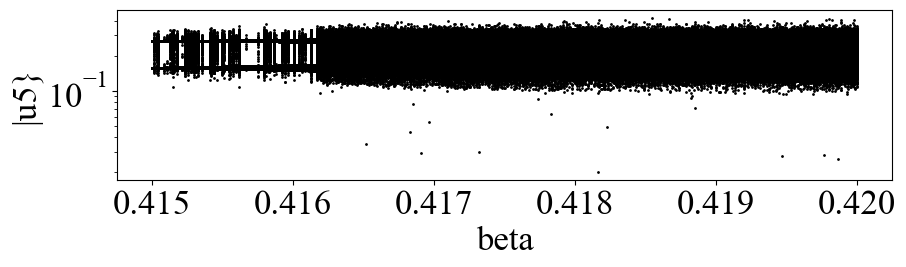

In [3]:
filename = "../bif_data/bif_0.415to0.417_nu0.00018to0.00018_300steps_period1e+06_dump50000.txt"

#プロットの設定
fig = plt.figure(figsize=(10,15))

spec = gridspec.GridSpec(ncols=1, nrows=3, height_ratios=[4, 1, 1])

# ax1 = fig.add_subplot(spec[0],projection='3d')
# ax1.set_xlabel("beta")
# ax1.set_ylabel("nu(log10)")
# ax1.set_zlabel("|u5|(log10)")

ax2 = fig.add_subplot(spec[1])
ax2.set_xlabel("beta")
ax2.set_ylabel("|u5}")
ax2.set_yscale("log")
ax2.xaxis_inverted()

# ax3 = fig.add_subplot(spec[2])
# ax3.set_xlabel("nu")
# ax3.set_ylabel("|u5|")
# ax3.set_xscale("log")
# ax3.set_yscale("log")

with open(filename, "r") as file:
    # for line in tqdm(file):
    for line in file:
        parts = line.split()  # 行をスペースで分割
        beta = float(parts[0])  # 1つ目の数値をfloatに変換
        nu = float(parts[1])  # 2つ目の数値をfloatに変換  
        # parts[2]をfloatに変換してリストにする
        values = list(map(float, parts[2:]))
    
    #     #3dプロット
    #     z_list_log = np.log10(z_list)
    #     ax1.scatter([beta_param[i]]*len(z_list),[log_range[i]]*len(z_list),z_list_log, s=1)

        #2dプロット
        ax2.scatter([beta]*len(values),values,s=1, c="black")

        # ax3.scatter([nu]*len(values),values,s=1)

# fig.tight_layout()
fig.savefig(fname=filename[:-4]+".png")


## 平均ラミナー継続時間分布

In [ ]:
a = np.loadtxt("../average_durations/data/beta0.416001-0.4161_32num_t1e+070.01_window1000.txt")
plt.scatter(a[:, 0], a[:, 1], )
# plt.plot(0, 1e+15)
plt.yscale("log")
# plt.xscale("log")
# plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees

## 誤差発展

(0.0, 1.0)

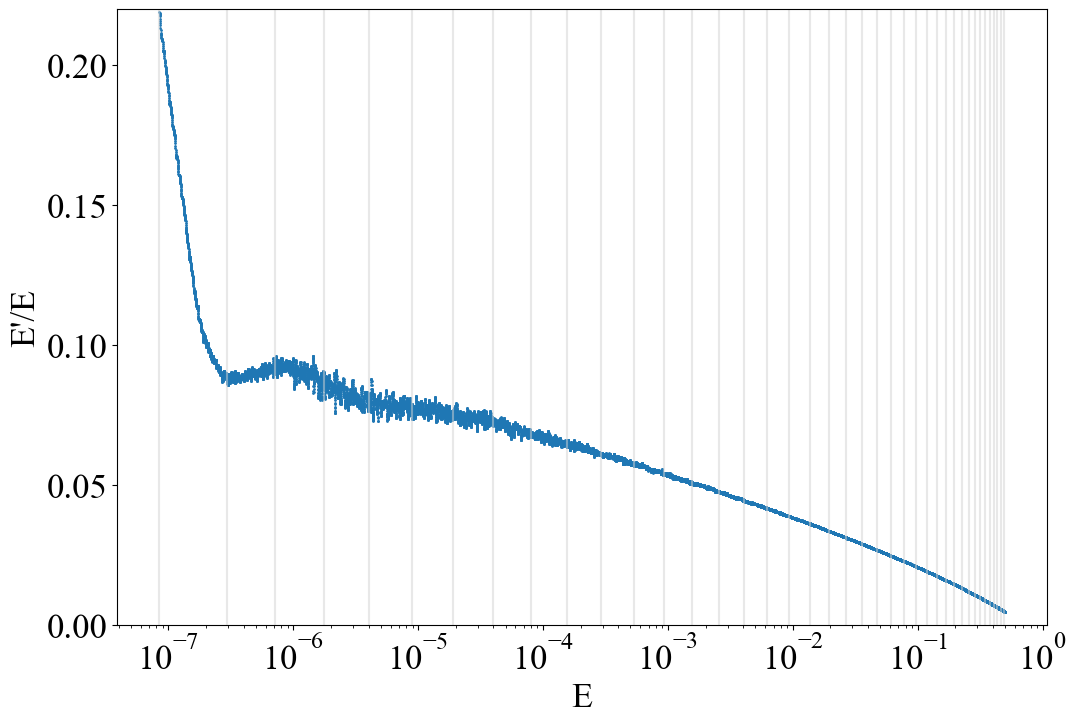

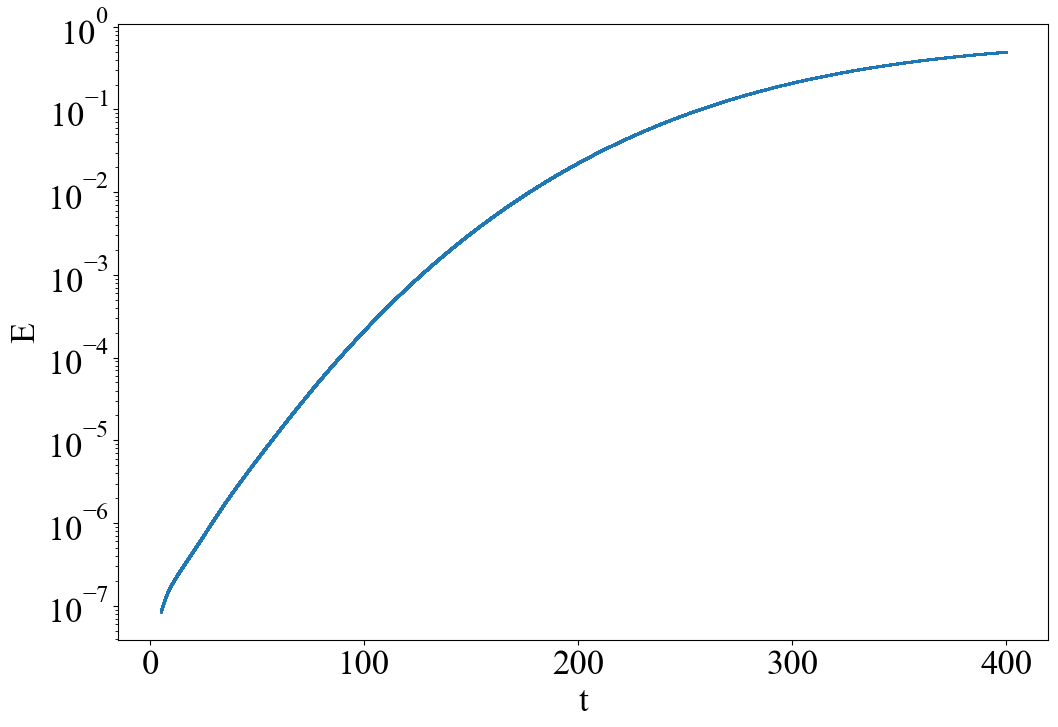

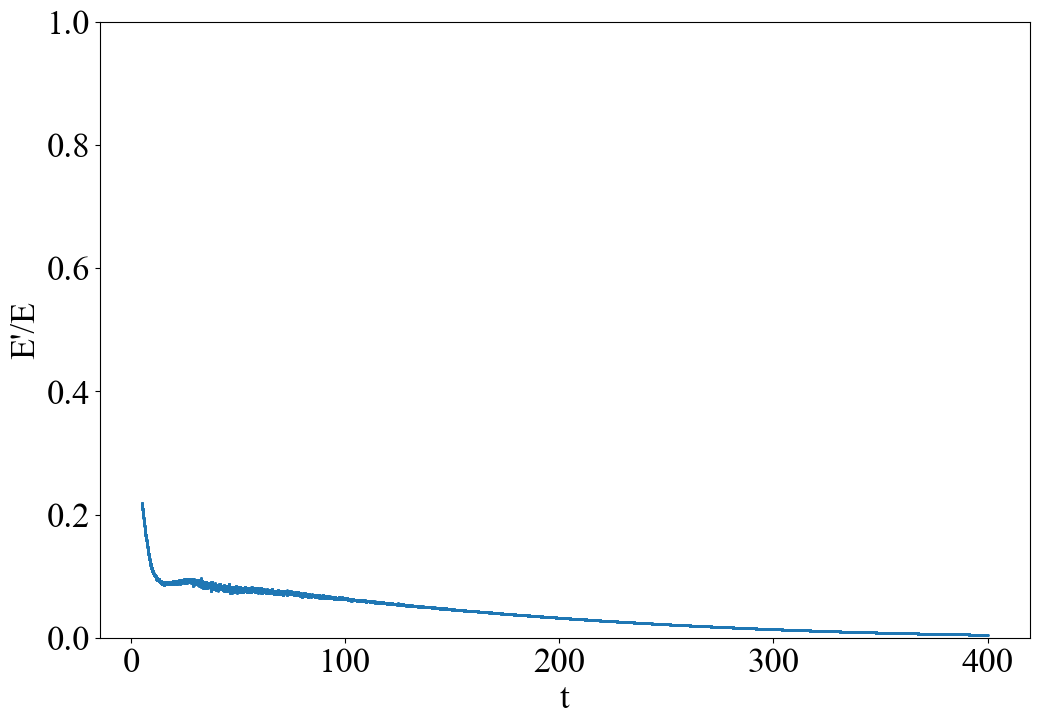

In [3]:
data = np.load("../error_growth/linear_beta0.5nu4e-05t400initial400dt0.01repeat76350000perturbed_dim13.npy")
begin = 500
end = -1
skip = 1

error = data[0,begin:end:skip]
error_growth = data[1,begin:end:skip]
time = data[2,begin:end:skip]

plt.figure(figsize=(12, 8))
# 10秒ごとにerrorをサンプリング，その値の時に薄いグレーで縦線を引く
for i in range(0, int(time[-1]), 10):
    plt.axvline(error[i*100], c="lightgray", alpha=0.5)
plt.scatter(error, error_growth, s=1)
plt.xlabel("E")
plt.ylabel("E'/E")
plt.ylim(0, 0.22)
# plt.xlim(-1, 10)
plt.xscale("log")

plt.figure(figsize=(12, 8))
plt.scatter(time, error, s=1)
plt.xlabel("t")
plt.ylabel("E")
plt.yscale("log")
# plt.xscale("log")

plt.figure(figsize=(12, 8))
plt.scatter(time, error_growth, s=1)
plt.xlabel("t")
plt.ylabel("E'/E")
# plt.xscale("log")
plt.ylim(0, 1)
# plt.xlim(0, 20)

## 高周波成分の値の分布(ガウス分布との比較) 

In [ ]:
traj = np.load("../traj/beta0.415_nu0.00018_100000period.npy")
#高周波成分を抽出
arr = np.abs(traj[-2, :])
#平均と分散を計算
mean = np.mean(arr)
var = np.var(arr)
max = np.max(arr)
min = np.min(arr)

#高周波成分の確率密度分布とガウス分布をプロット
plt.figure(figsize=(12, 8))
plt.hist(arr, bins=1000, density=True, alpha=0.5)
x = np.linspace(min, max, 1000)
y = 1/np.sqrt(2*np.pi*var)*np.exp(-(x-mean)**2/(2*var))
plt.plot(x, y, c="red")
plt.xlabel("U5")
plt.ylabel("Probability Density")
plt.yscale("log")
plt.show()

In [ ]:
traj = np.load("../traj/beta0.417_nu0.00018_100000period.npy")
#高周波成分を抽出
arr = np.abs(traj[-2, :])
#1e-10以下の値を除去
arr = arr[arr>1e-10]
#平均と分散を計算
mean = np.mean(arr)
var = np.var(arr)
max = np.max(arr)
min = np.min(arr)
print(f"mean: {mean}, var: {var}")

#高周波成分の確率密度分布とガウス分布をプロット
plt.figure(figsize=(12, 8))
plt.hist(arr, bins=1000, density=True, alpha=0.5)
x = np.linspace(min, max, 1000)
y = 1/np.sqrt(2*np.pi*var)*np.exp(-(x-mean)**2/(2*var))
plt.plot(x, y, c="red")
plt.xlabel("U5")
plt.ylabel("Probability Density")
plt.ylim(1e-1, 1e+7)
plt.yscale("log")
plt.show()